Given:
$$x = \{x_1,x_2,\cdots,x_d\}$$
$$P(x) = \frac{1}{Z}e^{\mu(x_1x_2+x_2x_3+ \cdots +x_{d-1}x_d)}$$
$$x_i = \pm 1$$
$$\mu = 2$$	
$$d = 10$$
$$M = \frac{1}{d}(x_1 + x_2 + \cdots + x_d)$$


In [104]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

%matplotlib inline

# for random sampling uncomment the following lines
# import time
# np.random.seed(int(time.time()))

# for reproducibility uncomment the following line
np.random.seed(42)


In [105]:
# Distribution and Utils

d = 10
mu = 2


def distribution(
    x: np.ndarray,
) -> float:
    s = np.dot(x[:-1], x[1:])
    return np.exp(mu * s)

# END def distribution

def init_x() -> np.ndarray:
    return np.random.choice([-1, 1], d)  # type: ignore
# END def init_x


def get_magnetization(
    X: np.ndarray,
) -> np.ndarray:
    return np.mean(X, axis=1)
# END def get_magnetization


Use Gibbs sampling to approximate the above distribution. Each sample represents a magnetization state of the lattice. Plot the variation of total magnetization M of the individual samples obtained at each epoch over the iterations. Also, plot the histogram of the final approximated distribution.

In [106]:
# Gibbs Sampling

def Gibbs_Sampler(
    x_init: np.ndarray,
    n_iter: int,
) -> np.ndarray:

    X = np.zeros((n_iter, d))
    x = x_init

    for i in tqdm(range(n_iter)):
        for j in range(d):
            x[j] = -1
            val_m1 = distribution(x)
            x[j] = 1
            val_p1 = distribution(x)
            p = val_p1 / (val_m1 + val_p1)

            if np.random.rand() < p:
                x[j] = 1
            else:
                x[j] = -1
            # END if

        # END for j

        X[i] = x
    # END for i

    return X

# END def Gibbs_Sampler


In [107]:
x_init = init_x()
n = int(1e5)

print(x_init)
X = Gibbs_Sampler(x_init, n)

magnetization = get_magnetization(X)

# print(X)
print(X.shape)
# print(magnetization)
print(magnetization.shape)


[-1  1 -1 -1 -1  1 -1 -1 -1  1]


  0%|          | 0/100000 [00:00<?, ?it/s]

(100000, 10)
(100000,)


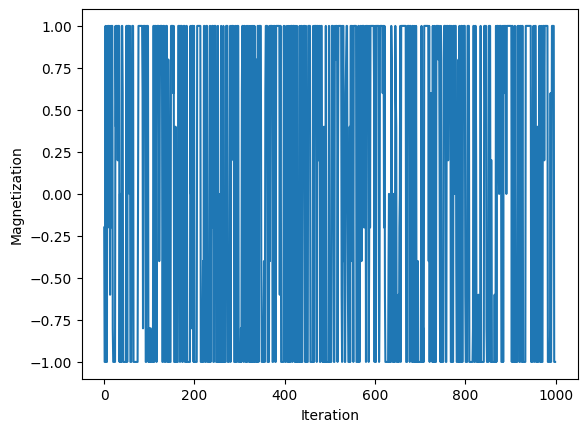

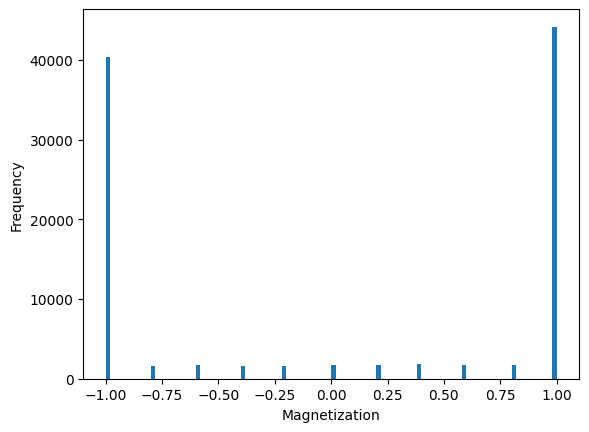

-1.0 : 40376
-0.8 : 1644
-0.6 : 1726
-0.4 : 1643
-0.2 : 1655
0.0 : 1705
0.2 : 1763
0.4 : 1822
0.6 : 1754
0.8 : 1720
1.0 : 44192


In [108]:
# magnetization vs iteration
plt.plot([magnetization[i] for i in range(0, n, 100)])
plt.xlabel("Iteration")
plt.ylabel("Magnetization")
plt.show()

# plot histogram of magnetization
plt.hist(magnetization, bins=100)
plt.xlabel("Magnetization")
plt.ylabel("Frequency")
plt.show()

# Relative frequency of magnetization
freq = {m: 0 for m in magnetization}
for m in magnetization:
    freq[m] += 1

for key, value in sorted(freq.items(), key=lambda x: x[0]):
    print("{} : {}".format(key, value))


Now,  Use Metropolis-Hastings sampling to approximate the above distribution. Plot the variation of total magnetization M over the iterations. Also, plot the histogram of the final approximated distribution. Consider the proposal distribution to be a Gaussian. Study the effect of variance of the Gaussian on the convergence of the sampler

In [109]:
# Metropolis Hastings

def Metropolis_Hastings(
    x_init: np.ndarray,
    sigma: float, 
    epochs: int,
):
    X = np.zeros((epochs, d))
    x = x_init

    for i in tqdm(range(epochs)):
        delta = np.random.normal(0, sigma, d)
        x_new = x + delta
        
        # since x_i = [-1, 1] we need to clip the values
        x_new = np.array([1 if x_i >= 0 else -1 for x_i in x_new])
        p = distribution(x_new) / distribution(x)
        
        p = min(1, p)
        
        if np.random.rand() < p:
            x = x_new
        # END if

        X[i] = x
    # END for i

    return X
# END def metropolis_hastings


In [110]:
x_init = init_x()
n = int(1e5)

print(x_init)
X = Metropolis_Hastings(x_init, 1, n)

magnetization = get_magnetization(X)

# print(X)
print(X.shape)
# print(magnetization)
print(magnetization.shape)


[ 1  1 -1  1  1  1 -1 -1 -1  1]


  0%|          | 0/100000 [00:00<?, ?it/s]

(100000, 10)
(100000,)


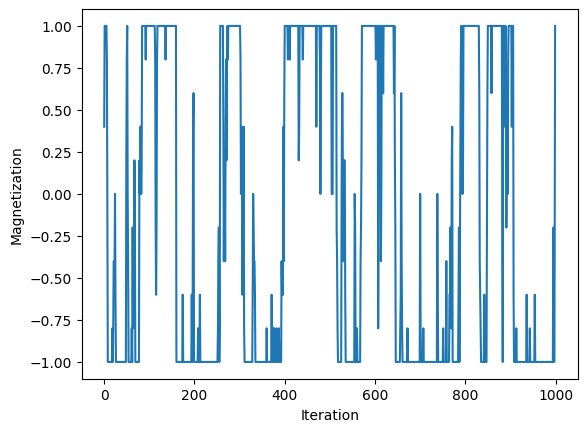

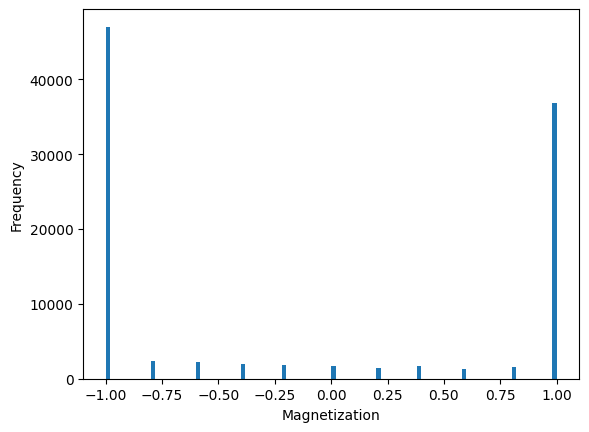

-1.0 : 47040
-0.8 : 2378
-0.6 : 2241
-0.4 : 1939
-0.2 : 1812
0.0 : 1733
0.2 : 1493
0.4 : 1702
0.6 : 1330
0.8 : 1534
1.0 : 36798


In [111]:
# magnetization vs iteration
plt.plot([magnetization[i] for i in range(0, n, 100)])
plt.xlabel("Iteration")
plt.ylabel("Magnetization")
plt.show()

# plot histogram of magnetization
plt.hist(magnetization, bins=100)
plt.xlabel("Magnetization")
plt.ylabel("Frequency")
plt.show()

# Relative frequency of magnetization
freq = {m: 0 for m in magnetization}
for m in magnetization:
    freq[m] += 1

for key, value in sorted(freq.items(), key=lambda x: x[0]):
    print("{} : {}".format(key, value))
